# Processamento de sinais com FFT

In [1]:
# Download dos dados usados
!wget "https://drive.google.com/u/0/uc?id=1N1T0Cn433PZwsiZg-L-PcsifnqXaqymv&export=download" -O "data.zip"
!unzip "/content/data.zip"

--2022-12-28 22:54:34--  https://drive.google.com/u/0/uc?id=1N1T0Cn433PZwsiZg-L-PcsifnqXaqymv&export=download
Resolving drive.google.com (drive.google.com)... 173.194.218.100, 173.194.218.101, 173.194.218.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1N1T0Cn433PZwsiZg-L-PcsifnqXaqymv&export=download [following]
--2022-12-28 22:54:34--  https://drive.google.com/uc?id=1N1T0Cn433PZwsiZg-L-PcsifnqXaqymv&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/busiedlq45kipikiur50adgi8i16kdh0/1672268025000/05372945725504702791/*/1N1T0Cn433PZwsiZg-L-PcsifnqXaqymv?e=download&uuid=5ae5cc69-67a8-41d4-85b8-0f9f7d208508 [following]
--2022-12-28 22:54:34--  https://doc-0s-70-docs.googleuserconten

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio 
%matplotlib inline

In [3]:
# Parametros para melhorar a qualidade do grafico
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

Em seguida, vamos abrir arquivos do tipo wav ou Waveform Audio File Format. Cada arquivo de audio foi tirado do site https://freesound.org/ e seguem com seus nomes originais.

In [6]:
path_do_audio = "/content/data/do-stretched-octave.wav"
path_mi_audio = "/content/data/mi-stretched.wav"
path_fa_audio = "/content/data/fa-stretched.wav"
path_la_audio = "/content/data-noise_a3s.wav"

Nota musical F

In [7]:
Audio(path_fa_audio)

Nota musical C

In [8]:
Audio(path_do_audio)

Nota musical E

In [9]:
Audio(path_mi_audio)

Cada audio contém uma nota tocada por piano e gravada com microfone digital. A frequência fundamental (F0) de algumas notas podem ser encontradas nessa tabela com frequências fundamentais de diferentes notas: https://pages.mtu.edu/~suits/notefreqs.html

Para um musico muito experiente seria possivel classificar algumas dessas notas apenas ouvindo algumas vezes, mas você saberia indentificar apenas pelo som qual é a tecla do piano? 

Seguindo as frequencias fundamentais das notas é possivel indentificar qual a tecla do piano. Como referencias usaremos essa tabela http://www.sengpielaudio.com/calculator-notenames.htm 

Seria possivel identiicar qualquer outro instrumento a partir dessa tabela:
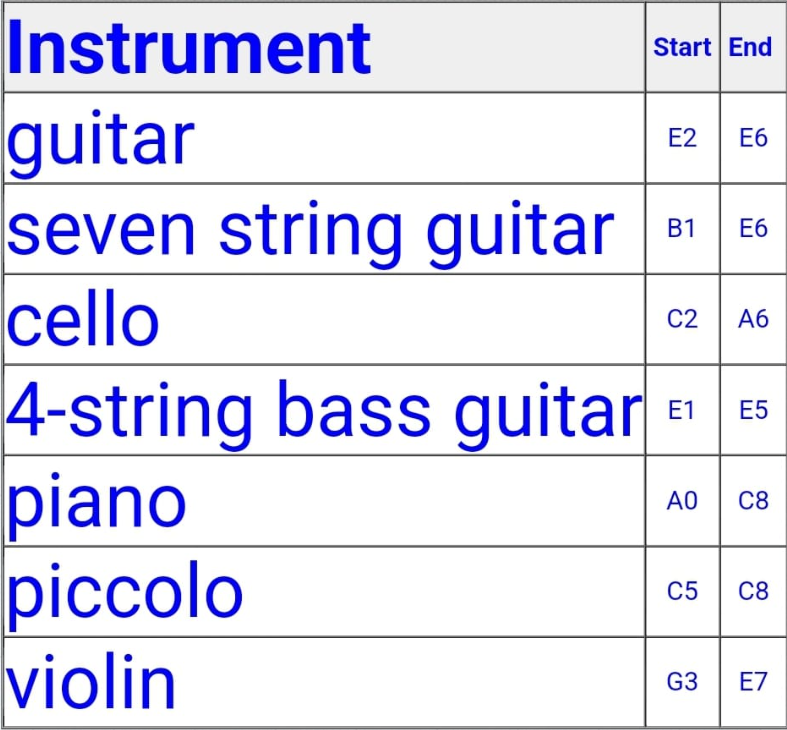

## Som digital

Quando você ouve um som, a membrana do seu ouvido oscila porque a densidade e a pressão do ar nas proximidades do ouvido também oscilam. Assim, as gravações sonoras contêm o sinal relativo dessas oscilações. O áudio digital é o som que foi gravado ou convertido em formato digital. No áudio digital, a onda sonora do sinal de áudio é codificada como amostras numéricas em sequência contínua. Por exemplo, em áudio de CD (ou WAV), as amostras são tiradas 44100 vezes por segundo, cada uma com profundidade de amostra de 16 bits, ou seja, existem 2^16 = 65536 valores possíveis do sinal: de -32768 a 32767. Para o exemplo abaixo, uma onda sonora, em vermelho, representada digitalmente, em azul (após amostragem e quantização de 4 bits).

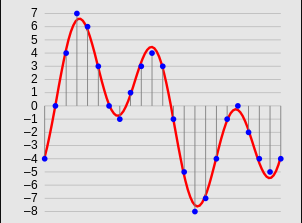

In [10]:
samp_freq_do, sound_do = wavfile.read(path_do_audio)
samp_freq_mi, sound_mi = wavfile.read(path_mi_audio)
samp_freq_fa, sound_fa = wavfile.read(path_fa_audio)

<ipython-input-10-6c950e94d424>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samp_freq_do, sound_do = wavfile.read(path_do_audio)
<ipython-input-10-6c950e94d424>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samp_freq_mi, sound_mi = wavfile.read(path_mi_audio)
<ipython-input-10-6c950e94d424>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samp_freq_fa, sound_fa = wavfile.read(path_fa_audio)


In [11]:
# A função scipy.io.wavfile.read() lê arquivos wav como int16 (para wavs de 16 bits) ou int32 (para wavs de 32 bits), arquivos wav de 24 bits não são suportados. Podemos verificar o tipo de som da seguinte forma:
print(f"{sound_do.dtype, samp_freq_do} \n{sound_mi.dtype, samp_freq_mi} \n{sound_fa.dtype, samp_freq_fa}")

(dtype('int16'), 44100) 
(dtype('int16'), 44100) 
(dtype('int16'), 44100)


Isso significa que os valores de pressão sonora são mapeados para valores inteiros que podem variar de -2^15 a (2^15)-1. As amostras são tomadas 44100 vezes por segundo.

Podemos converter nossa matriz de som (numpy) em valores de ponto flutuante variando de -1 a 1 da seguinte maneira:

In [12]:
def normalize_sound(sound):
    sound = sound / 2.0**15
    return sound

In [13]:
sound_do = normalize_sound(sound_do)
sound_mi = normalize_sound(sound_mi)
sound_fa = normalize_sound(sound_fa)

Normalmente, o arquivo wav estéreo contém duas matrizes de números inteiros: para o canal direito e esquerdo (para o alto-falante direito e esquerdo), respectivamente.

In [14]:
print(f"{sound_do.shape}\n{sound_mi.shape}\n{sound_fa.shape}")

(50343, 2)
(59255, 2)
(55023, 2)


Considerando a taxa de amostragem (sampFreq = 44110), isso corresponde a duração do audio.

In [15]:
def duration_time(sound, samp_freq):
    return(sound.shape[0] / samp_freq)

length_do = duration_time(sound_do, samp_freq_do)
length_mi = duration_time(sound_mi, samp_freq_mi)
length_fa = duration_time(sound_fa, samp_freq_fa)
print(f"{length_do}\n{length_mi}\n{length_fa}")

1.1415646258503402
1.3436507936507935
1.247687074829932


Uma representação de tempo do som pode ser obtida plotando os valores de pressão contra o eixo do tempo.

In [16]:
def plot_signal(sound):
    if len(sound.shape) < 2:
        plt.subplot(2,1,1)
        plt.plot(sound, 'r')
        plt.xlabel("one channel, sample #")
    else:
        plt.subplot(2,1,1)
        plt.plot(sound[:,0], 'r')
        plt.xlabel("left channel, sample #")
        plt.subplot(2,1,2)
        plt.plot(sound[:,1], 'b')
        plt.xlabel("right channel, sample #")
    plt.tight_layout()
    plt.show()

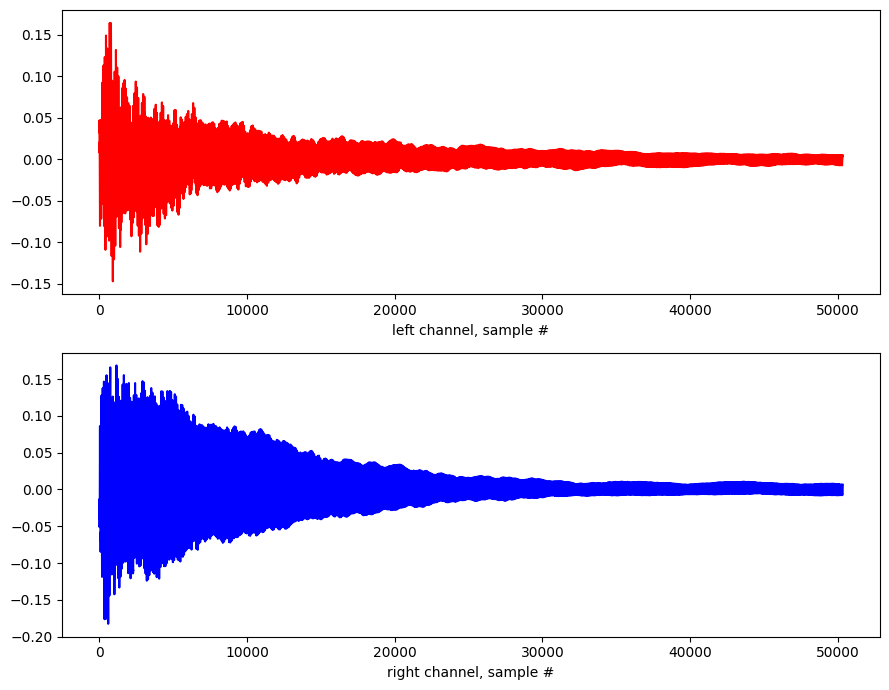

In [17]:
plot_signal(sound_do)

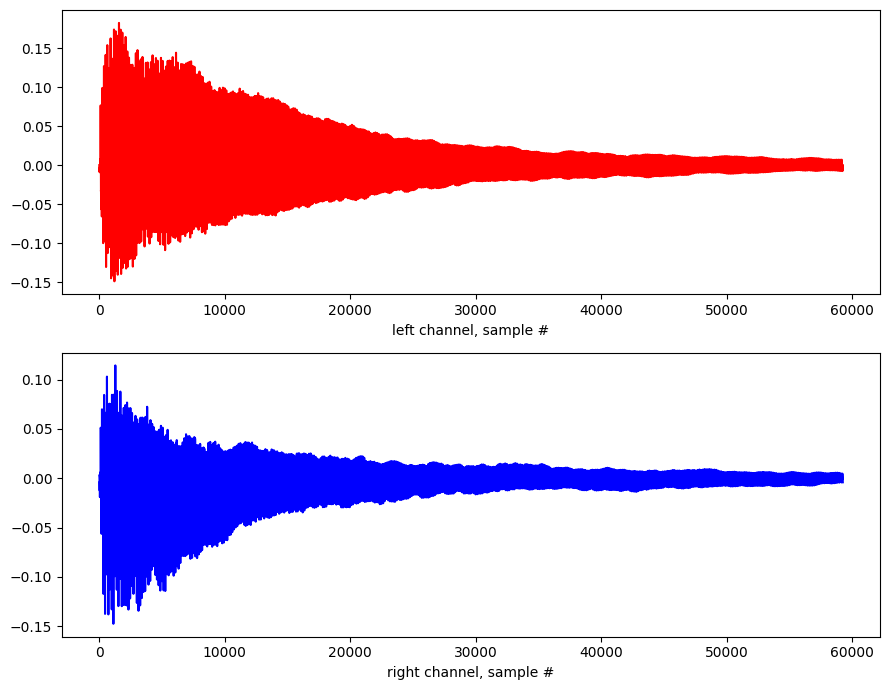

In [18]:
plot_signal(sound_mi)

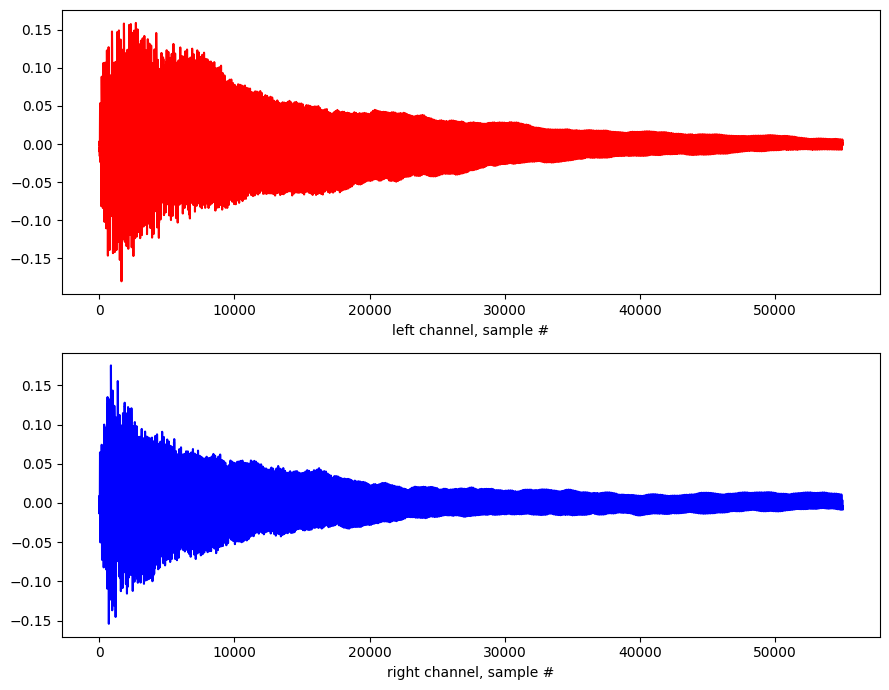

In [19]:
plot_signal(sound_fa)

No entanto, precisamos criar uma matriz contendo os pontos de tempo primeiro. Para obter o tempo adequado no eixo x, temos que gerar um array numpy usando sampFreq:

In [20]:
time_do = np.arange(sound_do.shape[0]) / sound_do.shape[0] * length_do
time_mi = np.arange(sound_mi.shape[0]) / sound_mi.shape[0] * length_mi
time_fa = np.arange(sound_fa.shape[0]) / sound_fa.shape[0] * length_fa

In [21]:
def plot_signal_time(time, sound):
    if len(sound.shape) < 2:
        plt.subplot(2,1,1)
        plt.plot(time, sound, 'r')
        plt.xlabel("time, s [one channel]")
        plt.ylabel("signal, relative units")
    else:
        plt.subplot(2,1,1)
        plt.plot(time, sound[:,0], 'r')
        plt.xlabel("time, s [left channel]")
        plt.ylabel("signal, relative units")
        plt.subplot(2,1,2)
        plt.plot(time, sound[:,1], 'b')
        plt.xlabel("time, s [right channel]")
        plt.ylabel("signal, relative units")
    plt.tight_layout()
    plt.show()

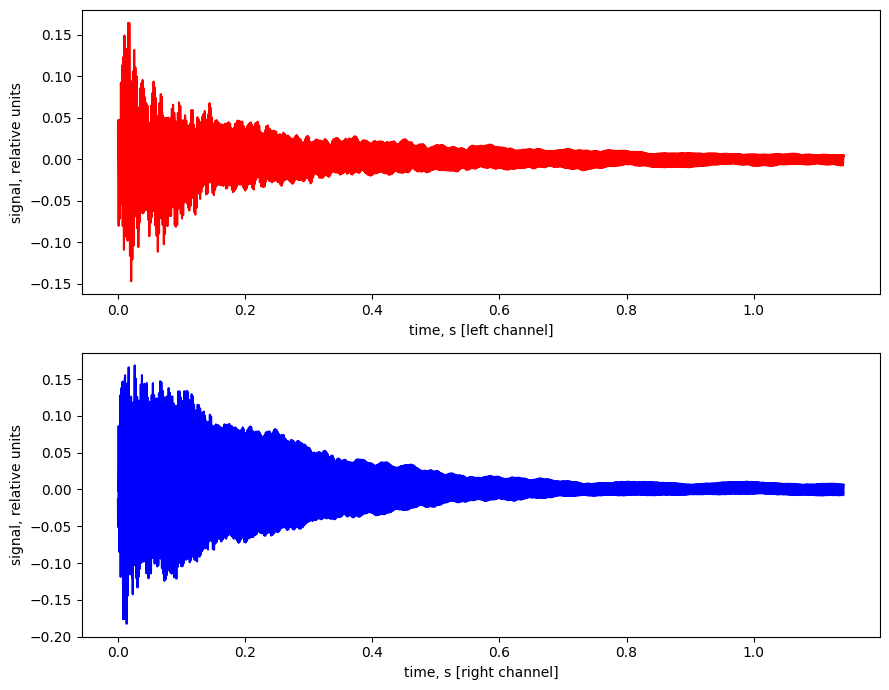

In [22]:
# Sinal representado no tempo em segundos
plot_signal_time(time_do, sound_do)

Vamos usar apenas um canal para explorar e entender melhor o nosso sinal

In [23]:
# Selecionando somente um canal
# signal_do = sound_do[:,0]
signal_mi = sound_mi[:,0]
signal_fa = sound_fa[:,0]
# Uma outra forma de transformar esse audio estereo para mono seria tirar a media entre os dois canais
signal_do = np.mean(sound_do, axis=1)

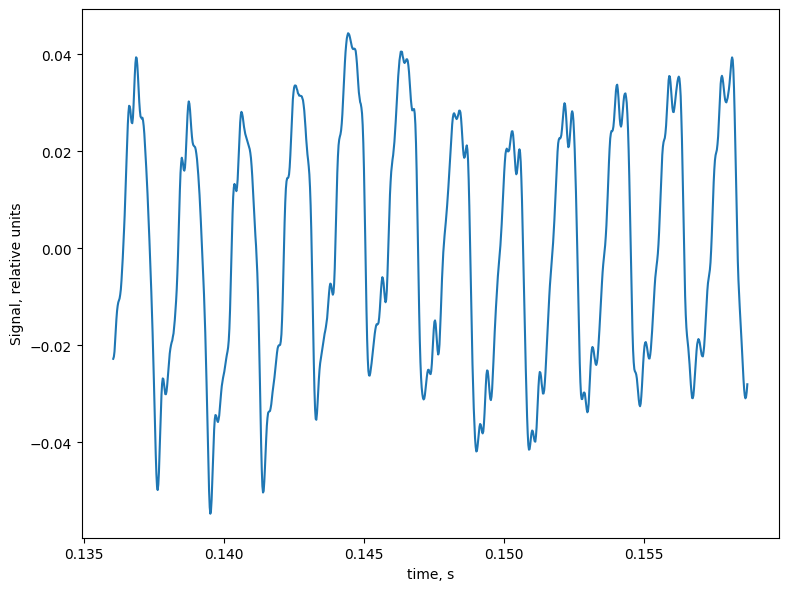

In [24]:
# É assim que a membrana do seu ouvido oscila em uma escala de microssegundos
plt.plot(time_do[6000:7000], signal_do[6000:7000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

## Dominio da frequência com Transformada de Fourier

Outra representação gráfica útil é a do conteúdo da frequência, ou espectro da nota. A maneira padrão de fazer isso é com uma transformada discreta de Fourier (https://en.wikipedia.org/wiki/Discrete_Fourier_transform) usando a transformação rápida de Fourier (https://en.wikipedia.org/wiki/Fast_Fourier_transform) ou algoritmo FFT . Basicamente, pegamos um sinal sonoro e isolamos as frequências das ondas senoidais que compõem esse som.

O algoritmo "Fast Fourier Transform" é uma forma otimizada para calcular o DFT. A implementação simples da DFT faz O(n²) operações. O algoritmo Cooley-Tukey FFT clássico implementado em FFTPACK é usado pelas bibliotecas SciPy e Numpy.

Inicialmente o algoritmo FFT foi usado por Gauss para determinar órbitas periódicas de asteroides, enquanto Cooley e Turkey o usaram para
detectar testes nucleares soviéticos e popularizaram o algoritmo. FFT ultiliza da tecnica de dividir e conquistar para fazer a multiplicação dos polinomios com uma complexidade de tempo O(nlogn).

Todo o nosso mundo digital usa esses algoritmos simples, mas realmente poderosos, que transformam sinais de seu domínio de tempo em seu domínio de frequência e vice-versa.

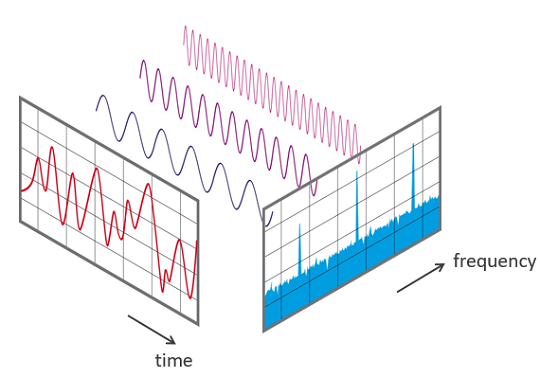

Então vamos usar a função np.fft.rfft(). Isso se destina a dados que não contêm números complexos, apenas números reais. A função np.fft.rfftfreq() sempre acompanha np.fft.rfft() porque fornece o caminho para obter as unidades de frequência apropriadas:

In [25]:
# Espectro da nota DO

fft_spectrum_do = np.fft.rfft(signal_do)
freq_do = np.fft.rfftfreq(signal_do.size, d=1./samp_freq_do)

Os valores retornados pela função FFT dos dados geralmente são complexos:

In [26]:
fft_spectrum_do

array([-0.43545532+0.j        , -0.4670547 -0.01472934j,
       -0.44233527+0.04708927j, ...,  0.00216708-0.01594134j,
        0.00198855-0.00725616j,  0.00820513+0.02281945j])

Para simplificar o conceito sem entrar muito na parte teórica, digamos que quando realizamos o fft para obter X = fft(x), geralmente precisamos usar a magnitude do sinal no domínio espectral: A = |X| = sqrt(real(X)^2+ imagem(X)^2). Quanto à parte imaginária da transformada, ela pode ser usada para calcular a fase do sinal: Phi = Arg(X) = arctg(imag(X)/real(X)). Hoje não precisamos da parte da fase. Assim, para obter o espectro de Amplitude vs. Frequência, encontramos o valor absoluto da transformada de Fourier:

In [27]:
fft_spectrum_abs_do = np.abs(fft_spectrum_do)

In [28]:
# Valores absolutos
fft_spectrum_abs_do

array([0.43545532, 0.4672869 , 0.44483468, ..., 0.01608797, 0.00752371,
       0.02424978])

Assim, o espectro do som da nota DO (domínio da frequência) fica assim:

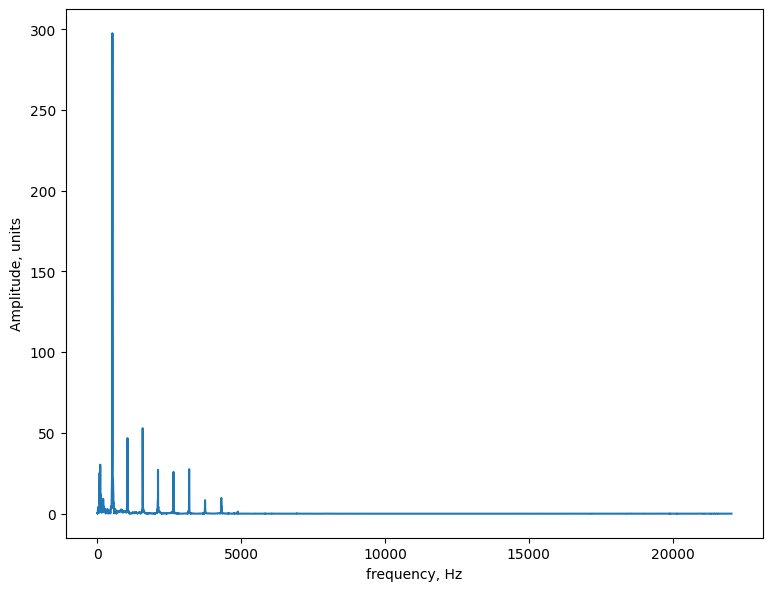

In [29]:
plt.plot(freq_do, fft_spectrum_abs_do)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

Um ser humano pode ouvir um som na faixa de 20 a 20.000 Hz. Vamos ampliar os picos mais altos:

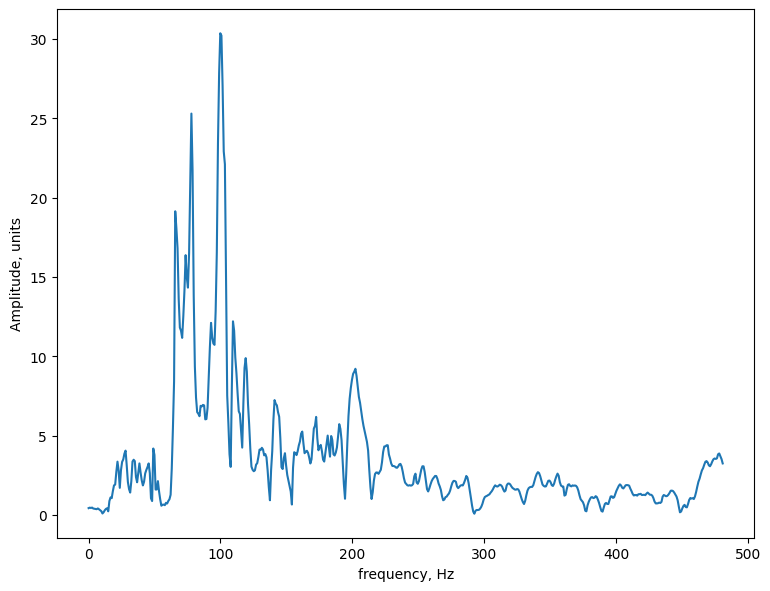

In [31]:
plt.plot(freq_do[:550], fft_spectrum_abs_do[:550])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

Vemos muitos picos igualmente espaçados e a distância entre eles é de aproximadamente 235 Hz. Vamos ampliar ainda mais:

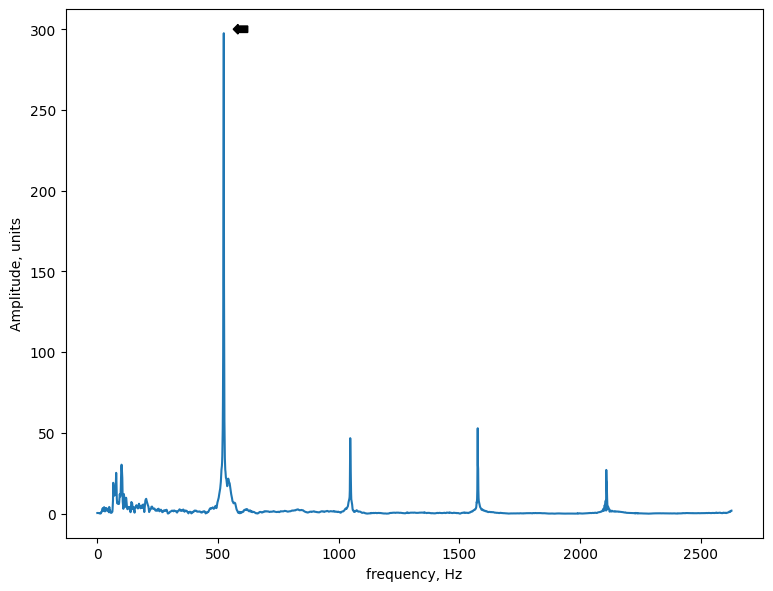

In [34]:
plt.plot(freq_do[:3000], fft_spectrum_abs_do[:3000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.arrow(623, 300, -40, 0, width=4, head_width=6, head_length=20, fc='k', ec='k')
plt.show()

O primeiro pico mais alto é chamado de frequência fundamental - e está próximo de 523 Hz. Os outros picos são chamados harmônicos e são múltiplos da frequência.

Nosso som é um tom C da quinta oitava (ou C5) gerado pelo piano. Vejamos todos os picos mais detalhadamente:

In [35]:
for i, f in enumerate(fft_spectrum_abs_do):
    if f > 50: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq_do[i],1),  np.round(f)))

frequency = 519.5 Hz with amplitude 52.0 
frequency = 520.3 Hz with amplitude 70.0 
frequency = 521.2 Hz with amplitude 98.0 
frequency = 522.1 Hz with amplitude 155.0 
frequency = 523.0 Hz with amplitude 199.0 
frequency = 523.8 Hz with amplitude 298.0 
frequency = 524.7 Hz with amplitude 142.0 
frequency = 525.6 Hz with amplitude 86.0 
frequency = 526.5 Hz with amplitude 57.0 
frequency = 1575.9 Hz with amplitude 53.0 


A magnitude mostrada é medida em unidades de volts. Há outras formas de apresentar esse valor como magnitude linear mas isso fica para uma outra discursão.

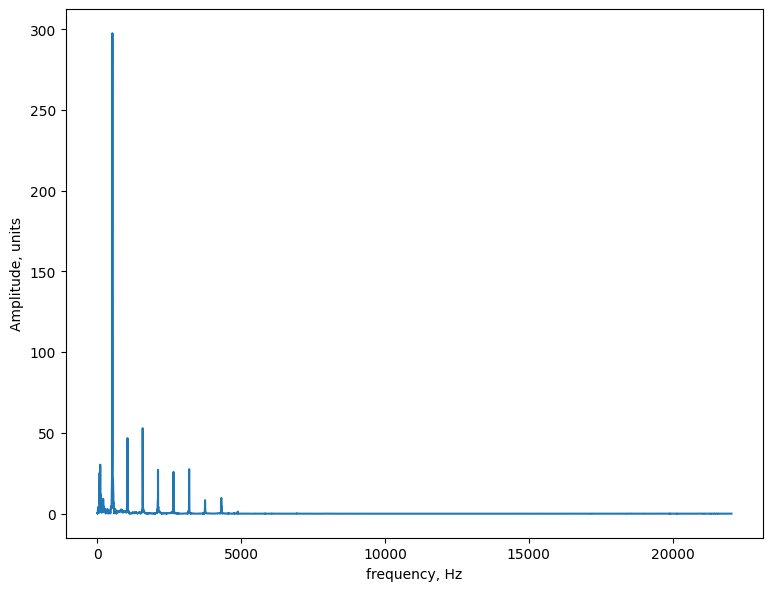

In [36]:
plt.plot(freq_do, np.abs(fft_spectrum_do))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

In [37]:
import pandas as pd
colnames = ["midi", "note", "note_n", "freq", "freq_ranger"]

df_notes = pd.read_csv("/content/data/note_freq_440_432.csv", names=colnames, header=None)

Aqui podemos pegar o maior pico e verificar se sua frequencia está em nossa tabela de notas.

In [38]:
freq_i = np.where(fft_spectrum_abs_do == max(fft_spectrum_abs_do[:3000]))
fundamental_freq = float(np.round(freq_do[freq_i],1))
fundamental_freq

523.8

A partir da frequencia fundamental podemos saber qual a nota tocada.
Foi usado uma tabela em csv para busca da frequencia

In [39]:
df_notes[(df_notes["freq"]>=fundamental_freq - 1) & (df_notes["freq"]<=fundamental_freq + 1)]

,midi,note,note_n,freq,freq_ranger
51,72,C,5,523.251,513.74


Temos um outro caso onde possuimos antes da frequencia fundamental um ruido.

In [40]:
path_la_audio = "/content/data/data-noise_a3s.wav"

samp_freq_la, sound_la = wavfile.read(path_la_audio)
sound_la = normalize_sound(sound_la)

signal_la = np.mean(sound_la, axis=1)
fft_spectrum_la = np.fft.rfft(signal_la)
freq_la = np.fft.rfftfreq(signal_la.size, d=1./samp_freq_la)

fft_spectrum_abs_la = np.abs(fft_spectrum_la)

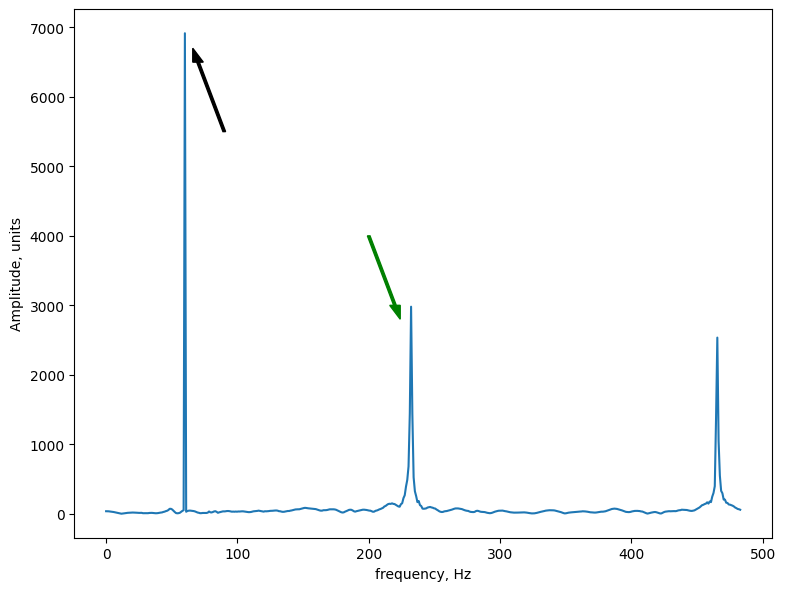

In [41]:
plt.plot(freq_la[:500], fft_spectrum_abs_la[:500])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.arrow(90, 5500, -20, 1000, width=2, head_width=8, head_length=200, fc='k', ec='k')
plt.arrow(200, 4000, 20, -1000, width=2, head_width=8, head_length=200, fc='g', ec='g')
plt.show()

O gráfico mostra um pico em torno de 60 Hz com a seta preta. Este é o padrão de frequência usado para AC (Alternating Current) na América do Norte onde, provavelmente, foi feita a gravação, e é bem perceptível quando você toca um som. Na Europa, por exemplo, a frequência padrão é de 50 Hz.

Este efeito é chamado de zumbido elétrico (detalhes https://en.wikipedia.org/wiki/Mains_hum). Resumindo, devido aos campos eletromagnéticos CA onipresentes de aparelhos e fiação próximos, o ruído elétrico de 60 Hz pode entrar nos sistemas de áudio. Isso chega ao microfone e é gravado. Ao gravar usando o microfone embutido em um laptop, uma boa maneira de evitar isso é desconectar o carregador da bateria durante a gravação.

Podemos remover esse ruido do nosso audio filtrando seus valores.

In [42]:
for i,f in enumerate(freq_la):
    if f < 62 and f > 58:# (1)
        fft_spectrum_la[i] = 0.0
    if f < 21 or f > 20000:# (2)
        fft_spectrum_la[i] = 0.0

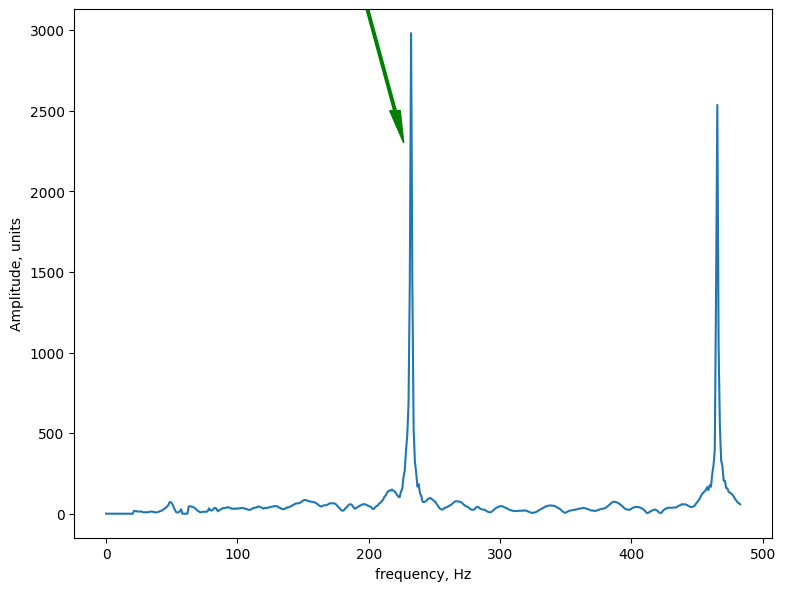

In [43]:
plt.plot(freq_la[:500], np.abs(fft_spectrum_la[:500]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.arrow(170, 4000, 50, -1500, width=2, head_width=8, head_length=200, fc='g', ec='g')
plt.show()

Temos agora nosso sinal sem o ruido, agora podemos fazer uma transformada inversa para ter novamente o audio no dominio do tempo e salvar para ouvir.

In [44]:
noiseless_signal = np.fft.irfft(fft_spectrum_la)

In [45]:
wavfile.write("/content/noiseless_signal_la.wav", samp_freq_la, noiseless_signal)

In [46]:
Audio(path_la_audio)

Faça o download do arquivo e compare com o som reproduzido com o ruido. Note que não possui mais um som grave de fundo.
Por fim vimos algumas aplicações com o uso do algoritmo FFT. Há muitas outras frentes que a usam. O mais importante é se ter uma noção de como podemos aplicar algoritmos para resolução de problemas e entendimento do mundo real.